In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#lets generate some points for the sine wave
#make sure to add +1 to the num(500) to get equally spaced values
np.linspace(0,50,501)

array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
        1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
        2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
        3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
        4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
        5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
        6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
        7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
        8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
        9.9, 10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9,
       11. , 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12. ,
       12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. , 13.1,
       13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1, 14.2,
       14.3, 14.4, 14.5, 14.6, 14.7, 14.8, 14.9, 15

In [3]:
x = np.linspace(0,50,501)
y= np.sin(x)
y

array([ 0.00000000e+00,  9.98334166e-02,  1.98669331e-01,  2.95520207e-01,
        3.89418342e-01,  4.79425539e-01,  5.64642473e-01,  6.44217687e-01,
        7.17356091e-01,  7.83326910e-01,  8.41470985e-01,  8.91207360e-01,
        9.32039086e-01,  9.63558185e-01,  9.85449730e-01,  9.97494987e-01,
        9.99573603e-01,  9.91664810e-01,  9.73847631e-01,  9.46300088e-01,
        9.09297427e-01,  8.63209367e-01,  8.08496404e-01,  7.45705212e-01,
        6.75463181e-01,  5.98472144e-01,  5.15501372e-01,  4.27379880e-01,
        3.34988150e-01,  2.39249329e-01,  1.41120008e-01,  4.15806624e-02,
       -5.83741434e-02, -1.57745694e-01, -2.55541102e-01, -3.50783228e-01,
       -4.42520443e-01, -5.29836141e-01, -6.11857891e-01, -6.87766159e-01,
       -7.56802495e-01, -8.18277111e-01, -8.71575772e-01, -9.16165937e-01,
       -9.51602074e-01, -9.77530118e-01, -9.93691004e-01, -9.99923258e-01,
       -9.96164609e-01, -9.82452613e-01, -9.58924275e-01, -9.25814682e-01,
       -8.83454656e-01, -

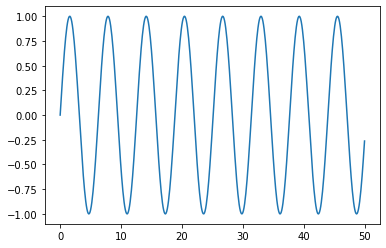

In [4]:
#visualizing the sine wave
plt.plot(x,y)

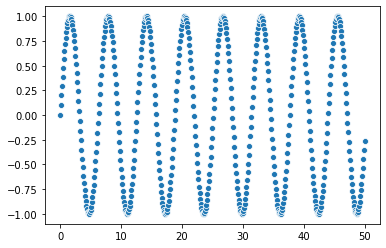

In [5]:
sns.scatterplot(x,y)

In [6]:
#convert the x and y values to a dataframe

In [7]:
df = pd.DataFrame(y,columns=['sine'],index=x)
df

,sine
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418
...,...
49.6,-0.617439
49.7,-0.535823
49.8,-0.448854
49.9,-0.357400


In [8]:
#the data is put in a dataframe so that train and test data split can be made easily and can be used in the time series generator

In [9]:
#train test split
#lets split 10% of the data for test

In [10]:
len(df)

501

In [11]:
len(df)*0.1

50.1

In [12]:
#lets create a general formula for future splits

In [13]:
test_percent = 0.1

In [14]:
test_point = np.round(len(df)*test_percent)
test_point

50.0

In [15]:
test_index = int(len(df) - test_point)
test_index

451

In [16]:
#convert the index to int so that we can use it in indexing else therell be an error

In [17]:
train = df.iloc[:test_index]
test = df.iloc[test_index:]

In [18]:
train

,sine
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418
...,...
44.6,0.579164
44.7,0.657656
44.8,0.729577
44.9,0.794208


In [19]:
#normalising the data for both train and test(ie for both x input and y labels this time as we need time stamped data)
#fit for only train data and not test

In [20]:
from sklearn.preprocessing import MinMaxScaler

In [21]:
scaler = MinMaxScaler()

In [22]:
scaled_train = scaler.fit_transform(train)
scaled_test = scaler.transform(test)

In [23]:
scaled_train

array([[4.99999116e-01],
       [5.49916225e-01],
       [5.99334579e-01],
       [6.47760405e-01],
       [6.94709850e-01],
       [7.39713809e-01],
       [7.82322618e-01],
       [8.22110545e-01],
       [8.58680040e-01],
       [8.91665714e-01],
       [9.20737985e-01],
       [9.45606372e-01],
       [9.66022399e-01],
       [9.81782075e-01],
       [9.92727935e-01],
       [9.98750612e-01],
       [9.99789928e-01],
       [9.95835500e-01],
       [9.86926839e-01],
       [9.73152957e-01],
       [9.54651478e-01],
       [9.31607263e-01],
       [9.04250562e-01],
       [8.72854714e-01],
       [8.37733417e-01],
       [7.99237589e-01],
       [7.57751870e-01],
       [7.13690771e-01],
       [6.67494535e-01],
       [6.19624741e-01],
       [5.70559686e-01],
       [5.20789614e-01],
       [4.70811810e-01],
       [4.21125636e-01],
       [3.72227539e-01],
       [3.24606094e-01],
       [2.78737119e-01],
       [2.35078919e-01],
       [1.94067715e-01],
       [1.56113277e-01],


In [24]:
#using timeseries generator to generate timestamped data

In [25]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [26]:
help(TimeseriesGenerator)

Help on class TimeseriesGenerator in module tensorflow.python.keras.preprocessing.sequence:

class TimeseriesGenerator(keras_preprocessing.sequence.TimeseriesGenerator, tensorflow.python.keras.utils.data_utils.Sequence)
 |  TimeseriesGenerator(data, targets, length, sampling_rate=1, stride=1, start_index=0, end_index=None, shuffle=False, reverse=False, batch_size=128)
 |  
 |  Utility class for generating batches of temporal data.
 |  This class takes in a sequence of data-points gathered at
 |  equal intervals, along with time series parameters such as
 |  stride, length of history, etc., to produce batches for
 |  training/validation.
 |  # Arguments
 |      data: Indexable generator (such as list or Numpy array)
 |          containing consecutive data points (timesteps).
 |          The data should be at 2D, and axis 0 is expected
 |          to be the time dimension.
 |      targets: Targets corresponding to timesteps in `data`.
 |          It should have same length as `data`.
 | 

In [27]:
#define the length of the input to the generator and batch size
#data will contain the points we are trying to predict and the target will contain the timesteps
#here both the data and the timesteps is the same scaled_train as it contains both
length = 2
batch_size = 1
generator = TimeseriesGenerator(scaled_train,scaled_train,length=length,batch_size=batch_size)

In [28]:
generator

In [29]:
generator[0]

(array([[[0.49999912],
         [0.54991622]]]),
 array([[0.59933458]]))

In [30]:
#we can see that the first two points are the inputs and the third point is the y label its going to predict

In [31]:
scaled_train

array([[4.99999116e-01],
       [5.49916225e-01],
       [5.99334579e-01],
       [6.47760405e-01],
       [6.94709850e-01],
       [7.39713809e-01],
       [7.82322618e-01],
       [8.22110545e-01],
       [8.58680040e-01],
       [8.91665714e-01],
       [9.20737985e-01],
       [9.45606372e-01],
       [9.66022399e-01],
       [9.81782075e-01],
       [9.92727935e-01],
       [9.98750612e-01],
       [9.99789928e-01],
       [9.95835500e-01],
       [9.86926839e-01],
       [9.73152957e-01],
       [9.54651478e-01],
       [9.31607263e-01],
       [9.04250562e-01],
       [8.72854714e-01],
       [8.37733417e-01],
       [7.99237589e-01],
       [7.57751870e-01],
       [7.13690771e-01],
       [6.67494535e-01],
       [6.19624741e-01],
       [5.70559686e-01],
       [5.20789614e-01],
       [4.70811810e-01],
       [4.21125636e-01],
       [3.72227539e-01],
       [3.24606094e-01],
       [2.78737119e-01],
       [2.35078919e-01],
       [1.94067715e-01],
       [1.56113277e-01],


In [32]:
xs,ys = generator[0]

In [33]:
xs

array([[[0.49999912],
        [0.54991622]]])

In [34]:
ys

array([[0.59933458]])

In [35]:
#for our case where we are predicting sine wave we need a bigger input size(length) so that the model can recognise the pattern

In [36]:
length = 50
batch_size = 1
generator = TimeseriesGenerator(scaled_train,scaled_train,length = length,batch_size = batch_size)

In [37]:
generator[0]

(array([[[4.99999116e-01],
         [5.49916225e-01],
         [5.99334579e-01],
         [6.47760405e-01],
         [6.94709850e-01],
         [7.39713809e-01],
         [7.82322618e-01],
         [8.22110545e-01],
         [8.58680040e-01],
         [8.91665714e-01],
         [9.20737985e-01],
         [9.45606372e-01],
         [9.66022399e-01],
         [9.81782075e-01],
         [9.92727935e-01],
         [9.98750612e-01],
         [9.99789928e-01],
         [9.95835500e-01],
         [9.86926839e-01],
         [9.73152957e-01],
         [9.54651478e-01],
         [9.31607263e-01],
         [9.04250562e-01],
         [8.72854714e-01],
         [8.37733417e-01],
         [7.99237589e-01],
         [7.57751870e-01],
         [7.13690771e-01],
         [6.67494535e-01],
         [6.19624741e-01],
         [5.70559686e-01],
         [5.20789614e-01],
         [4.70811810e-01],
         [4.21125636e-01],
         [3.72227539e-01],
         [3.24606094e-01],
         [2.78737119e-01],
 

In [38]:
#creating the model

In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN,Dense,LSTM

In [47]:
model = Sequential()

In [48]:
#the input layer will be rnn layer with units = length of generator
#let the input shape be (length of input,nos of features)
model.add(SimpleRNN(50,input_shape=(50,1)))

#o/p layer of 1 neuron
model.add(Dense(1))

#the loss is mse for continuous values(regression) 
model.compile(optimizer='adam',loss='mse',metrics=['accuracy'])


In [49]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 50)                2600      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 2,651
Trainable params: 2,651
Non-trainable params: 0
_________________________________________________________________


In [50]:
model.fit_generator(generator,epochs=5)

Epoch 1/5
401/401 [==============================] - 23s 58ms/step - loss: 0.0072 - accuracy: 0.0050
Epoch 2/5
401/401 [==============================] - 23s 58ms/step - loss: 4.3111e-05 - accuracy: 0.0050
Epoch 3/5
401/401 [==============================] - 23s 58ms/step - loss: 2.9372e-05 - accuracy: 0.0050
Epoch 4/5
401/401 [==============================] - 23s 58ms/step - loss: 3.2610e-04 - accuracy: 0.0050
Epoch 5/5
401/401 [==============================] - 23s 58ms/step - loss: 3.1562e-04 - accuracy: 0.0050


In [51]:
#the model trains for 401 steps as it has to predict the next values based on the input shape of 50 by considering the predicted values in the sequence
model.history.history

{'loss': [0.0071760869721489914,
  4.3110931616716285e-05,
  2.9371544447885932e-05,
  0.0003261032331797621,
  0.00031561675565249236],
 'accuracy': [0.0049875313,
  0.0049875313,
  0.0049875313,
  0.0049875313,
  0.0049875313]}

In [52]:
pd.DataFrame(model.history.history)

,loss,accuracy
0,0.007176,0.004988
1,0.000043,0.004988
2,0.000029,0.004988
3,0.000326,0.004988
4,0.000316,0.004988


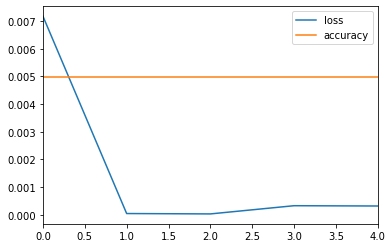

In [53]:
pd.DataFrame(model.history.history).plot()

In [54]:
#evaluating the data

In [55]:
scaled_train[:51]

array([[4.99999116e-01],
       [5.49916225e-01],
       [5.99334579e-01],
       [6.47760405e-01],
       [6.94709850e-01],
       [7.39713809e-01],
       [7.82322618e-01],
       [8.22110545e-01],
       [8.58680040e-01],
       [8.91665714e-01],
       [9.20737985e-01],
       [9.45606372e-01],
       [9.66022399e-01],
       [9.81782075e-01],
       [9.92727935e-01],
       [9.98750612e-01],
       [9.99789928e-01],
       [9.95835500e-01],
       [9.86926839e-01],
       [9.73152957e-01],
       [9.54651478e-01],
       [9.31607263e-01],
       [9.04250562e-01],
       [8.72854714e-01],
       [8.37733417e-01],
       [7.99237589e-01],
       [7.57751870e-01],
       [7.13690771e-01],
       [6.67494535e-01],
       [6.19624741e-01],
       [5.70559686e-01],
       [5.20789614e-01],
       [4.70811810e-01],
       [4.21125636e-01],
       [3.72227539e-01],
       [3.24606094e-01],
       [2.78737119e-01],
       [2.35078919e-01],
       [1.94067715e-01],
       [1.56113277e-01],


In [57]:
scaled_train[-50:]

array([[8.37405820e-01],
       [7.98881698e-01],
       [7.57371240e-01],
       [7.13289205e-01],
       [6.67076045e-01],
       [6.19193508e-01],
       [5.70120021e-01],
       [5.20345908e-01],
       [4.70368497e-01],
       [4.20687145e-01],
       [3.71798252e-01],
       [3.24190300e-01],
       [2.78338972e-01],
       [2.34702398e-01],
       [1.93716581e-01],
       [1.55791039e-01],
       [1.21304709e-01],
       [9.06021693e-02],
       [6.39901882e-02],
       [4.17346643e-02],
       [2.40579672e-02],
       [1.11367167e-02],
       [3.10001778e-03],
       [2.81703720e-05],
       [1.95186738e-03],
       [8.85188786e-03],
       [2.06592891e-02],
       [3.72560954e-02],
       [5.84764771e-02],
       [8.41084070e-02],
       [1.13895779e-01],
       [1.47540969e-01],
       [1.84707803e-01],
       [2.25024924e-01],
       [2.68089497e-01],
       [3.13471233e-01],
       [3.60716695e-01],
       [4.09353821e-01],
       [4.58896644e-01],
       [5.08850150e-01],


In [59]:
scaled_train[401:451]

array([[8.37405820e-01],
       [7.98881698e-01],
       [7.57371240e-01],
       [7.13289205e-01],
       [6.67076045e-01],
       [6.19193508e-01],
       [5.70120021e-01],
       [5.20345908e-01],
       [4.70368497e-01],
       [4.20687145e-01],
       [3.71798252e-01],
       [3.24190300e-01],
       [2.78338972e-01],
       [2.34702398e-01],
       [1.93716581e-01],
       [1.55791039e-01],
       [1.21304709e-01],
       [9.06021693e-02],
       [6.39901882e-02],
       [4.17346643e-02],
       [2.40579672e-02],
       [1.11367167e-02],
       [3.10001778e-03],
       [2.81703720e-05],
       [1.95186738e-03],
       [8.85188786e-03],
       [2.06592891e-02],
       [3.72560954e-02],
       [5.84764771e-02],
       [8.41084070e-02],
       [1.13895779e-01],
       [1.47540969e-01],
       [1.84707803e-01],
       [2.25024924e-01],
       [2.68089497e-01],
       [3.13471233e-01],
       [3.60716695e-01],
       [4.09353821e-01],
       [4.58896644e-01],
       [5.08850150e-01],


In [60]:
#evaluating on the last 50 points in scaled_train 
first_batch = scaled_train[-length:]

In [61]:
first_batch

array([[8.37405820e-01],
       [7.98881698e-01],
       [7.57371240e-01],
       [7.13289205e-01],
       [6.67076045e-01],
       [6.19193508e-01],
       [5.70120021e-01],
       [5.20345908e-01],
       [4.70368497e-01],
       [4.20687145e-01],
       [3.71798252e-01],
       [3.24190300e-01],
       [2.78338972e-01],
       [2.34702398e-01],
       [1.93716581e-01],
       [1.55791039e-01],
       [1.21304709e-01],
       [9.06021693e-02],
       [6.39901882e-02],
       [4.17346643e-02],
       [2.40579672e-02],
       [1.11367167e-02],
       [3.10001778e-03],
       [2.81703720e-05],
       [1.95186738e-03],
       [8.85188786e-03],
       [2.06592891e-02],
       [3.72560954e-02],
       [5.84764771e-02],
       [8.41084070e-02],
       [1.13895779e-01],
       [1.47540969e-01],
       [1.84707803e-01],
       [2.25024924e-01],
       [2.68089497e-01],
       [3.13471233e-01],
       [3.60716695e-01],
       [4.09353821e-01],
       [4.58896644e-01],
       [5.08850150e-01],


In [63]:
#reshape the i/p to (nos of batches,length,features)
first_batch=first_batch.reshape(1,length,1)

In [64]:
model.predict(first_batch)

array([[0.943256]], dtype=float32)

In [67]:
scaled_test[0]

array([0.94955134])

In [68]:
#the model has evalluated by taking the last 50 points in the scaled_train data and predicted the next point which is the 
#first point in the scaled_test data

In [69]:
#to predict the values into the future now we need to put this in a loop
#where the previous prediction is taken in input sequence for next prediction so that it follows a pattern

In [77]:
test_predictions = []
first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, 1))

In [80]:
current_batch

array([[[8.37405820e-01],
        [7.98881698e-01],
        [7.57371240e-01],
        [7.13289205e-01],
        [6.67076045e-01],
        [6.19193508e-01],
        [5.70120021e-01],
        [5.20345908e-01],
        [4.70368497e-01],
        [4.20687145e-01],
        [3.71798252e-01],
        [3.24190300e-01],
        [2.78338972e-01],
        [2.34702398e-01],
        [1.93716581e-01],
        [1.55791039e-01],
        [1.21304709e-01],
        [9.06021693e-02],
        [6.39901882e-02],
        [4.17346643e-02],
        [2.40579672e-02],
        [1.11367167e-02],
        [3.10001778e-03],
        [2.81703720e-05],
        [1.95186738e-03],
        [8.85188786e-03],
        [2.06592891e-02],
        [3.72560954e-02],
        [5.84764771e-02],
        [8.41084070e-02],
        [1.13895779e-01],
        [1.47540969e-01],
        [1.84707803e-01],
        [2.25024924e-01],
        [2.68089497e-01],
        [3.13471233e-01],
        [3.60716695e-01],
        [4.09353821e-01],
        [4.5

In [79]:
#we can drop the first value of the first and append the new predicted value into the sequence
#current batch indexing means that [grab all the first dimension values(nos i/p),except the 0th index grab everything else(length),grab all features]
#the appending value has to match the current batch array
np.append(current_batch[:,1:,:],[[[99]]],axis=1)

array([[[7.98881698e-01],
        [7.57371240e-01],
        [7.13289205e-01],
        [6.67076045e-01],
        [6.19193508e-01],
        [5.70120021e-01],
        [5.20345908e-01],
        [4.70368497e-01],
        [4.20687145e-01],
        [3.71798252e-01],
        [3.24190300e-01],
        [2.78338972e-01],
        [2.34702398e-01],
        [1.93716581e-01],
        [1.55791039e-01],
        [1.21304709e-01],
        [9.06021693e-02],
        [6.39901882e-02],
        [4.17346643e-02],
        [2.40579672e-02],
        [1.11367167e-02],
        [3.10001778e-03],
        [2.81703720e-05],
        [1.95186738e-03],
        [8.85188786e-03],
        [2.06592891e-02],
        [3.72560954e-02],
        [5.84764771e-02],
        [8.41084070e-02],
        [1.13895779e-01],
        [1.47540969e-01],
        [1.84707803e-01],
        [2.25024924e-01],
        [2.68089497e-01],
        [3.13471233e-01],
        [3.60716695e-01],
        [4.09353821e-01],
        [4.58896644e-01],
        [5.0

In [82]:
for i in range(len(test)):
    current_pred  = model.predict(current_batch)[0]
    
    test_predictions.append(current_pred)
    
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [83]:
test_predictions

[array([0.943256], dtype=float32),
 array([0.95987463], dtype=float32),
 array([0.97282547], dtype=float32),
 array([0.97852504], dtype=float32),
 array([0.97979784], dtype=float32),
 array([0.97661614], dtype=float32),
 array([0.9682025], dtype=float32),
 array([0.9549032], dtype=float32),
 array([0.9372361], dtype=float32),
 array([0.91676944], dtype=float32),
 array([0.8918084], dtype=float32),
 array([0.8630042], dtype=float32),
 array([0.8314333], dtype=float32),
 array([0.7968796], dtype=float32),
 array([0.75948393], dtype=float32),
 array([0.7196198], dtype=float32),
 array([0.6776239], dtype=float32),
 array([0.6334054], dtype=float32),
 array([0.5871463], dtype=float32),
 array([0.5398837], dtype=float32),
 array([0.49197575], dtype=float32),
 array([0.442921], dtype=float32),
 array([0.39353368], dtype=float32),
 array([0.3442777], dtype=float32),
 array([0.2955931], dtype=float32),
 array([0.24801804], dtype=float32),
 array([0.2030566], dtype=float32),
 array([0.16029106],

In [86]:
#note-here the test data is just used for comparison and not for direct training as we are using continuously updating
#the trained sequence with predicted values until the length of the test set is reached

array([0.94955134])

In [91]:
pd.DataFrame([test_predictions,scaled_test]).transpose()

,0,1
0,[0.943256],[0.9495513437783747]
1,[0.95987463],[0.96915661771099]
2,[0.97282547],[0.9840742249685243]
3,[0.97852504],[0.9941551137503655]
4,[0.97979784],[0.9992985591481043]
5,[0.97661614],[0.9994531695555238]
6,[0.9682025],[0.9946174001565404]
7,[0.9549032],[0.9848395683604956]
8,[0.9372361],[0.970217371030574]
9,[0.91676944],[0.9508969083290422]


In [92]:
#lets compare with the true test
test

,sine
45.1,0.899097
45.2,0.938307
45.3,0.968142
45.4,0.988304
45.5,0.998591
45.6,0.998900
45.7,0.989229
45.8,0.969673
45.9,0.940429
46.0,0.901788


In [93]:
#the predicted values are scaled so perform inverse transform

In [94]:
test_pred = scaler.inverse_transform(test_predictions)

In [95]:
test_pred

array([[ 0.88650669],
       [ 0.91974365],
       [ 0.94564511],
       [ 0.95704417],
       [ 0.95958975],
       [ 0.95322641],
       [ 0.9363992 ],
       [ 0.90980084],
       [ 0.87446689],
       [ 0.83353397],
       [ 0.78361226],
       [ 0.72600436],
       [ 0.66286304],
       [ 0.59375618],
       [ 0.51896547],
       [ 0.43923786],
       [ 0.35524677],
       [ 0.2668104 ],
       [ 0.17429293],
       [ 0.07976847],
       [-0.01604659],
       [-0.11415529],
       [-0.21292917],
       [-0.31144031],
       [-0.40880873],
       [-0.5039581 ],
       [-0.59388026],
       [-0.67941066],
       [-0.7599678 ],
       [-0.83255427],
       [-0.89694591],
       [-0.95205922],
       [-0.99523409],
       [-1.02838181],
       [-1.0514284 ],
       [-1.06274515],
       [-1.06215938],
       [-1.05042023],
       [-1.02846046],
       [-0.9965256 ],
       [-0.95503404],
       [-0.90585215],
       [-0.84859993],
       [-0.78305531],
       [-0.71156225],
       [-0

In [97]:
#ignore the warning as its just trying to inform us that we are changing the dataframe
test['predictions'] = test_pred

c:\users\prajv\desktop\pycharmprojects\ps-py\venv\tflow_env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [98]:
test

,sine,predictions
45.1,0.899097,0.886507
45.2,0.938307,0.919744
45.3,0.968142,0.945645
45.4,0.988304,0.957044
45.5,0.998591,0.959590
45.6,0.998900,0.953226
45.7,0.989229,0.936399
45.8,0.969673,0.909801
45.9,0.940429,0.874467
46.0,0.901788,0.833534


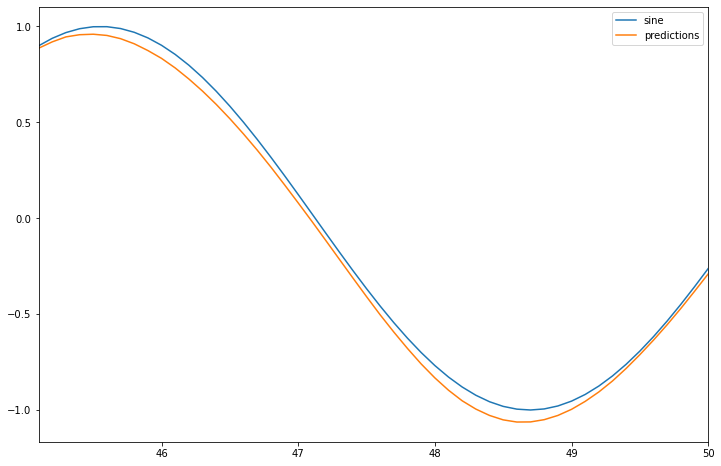

In [101]:
test.plot(figsize=(12,8))

In [102]:
#pretty good performance on predicting the sine wave

In [103]:
#Using LSTM , callbacks and validation data

In [104]:
from tensorflow.keras.callbacks import EarlyStopping

In [105]:
early_stop = EarlyStopping(monitor='val_loss',patience=1)

In [106]:
#to have validation generator the size of the scaled_test must be greater than the length else it wont work

In [107]:
len(scaled_test)

50

In [108]:
length = 49
generator = TimeseriesGenerator(scaled_train,scaled_train,length = length,batch_size = 1)
validation_generator = TimeseriesGenerator(scaled_test,scaled_test,length=length,batch_size=1)

In [110]:
# define model
model = Sequential()

# LSTM layer which has 4 gates and 2 memory features(long and short term)
model.add(LSTM(50,input_shape=(length, 1)))

# Final Prediction
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

In [111]:
model.fit_generator(generator,validation_data=validation_generator,epochs=10,callbacks=[early_stop])

Epoch 1/10
402/402 [==============================] - 41s 101ms/step - loss: 0.0116 - val_loss: 4.6675e-05
Epoch 2/10
402/402 [==============================] - 40s 100ms/step - loss: 1.0020e-04 - val_loss: 1.8929e-05
Epoch 3/10
402/402 [==============================] - 41s 103ms/step - loss: 1.6218e-04 - val_loss: 1.1279e-04


In [113]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, 1))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [116]:
lstm_pred = scaler.inverse_transform(test_predictions)

In [118]:
test['lstm_predictions'] = lstm_pred

c:\users\prajv\desktop\pycharmprojects\ps-py\venv\tflow_env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [119]:
test

,sine,predictions,lstm_predictions
45.1,0.899097,0.886507,0.841770
45.2,0.938307,0.919744,0.870909
45.3,0.968142,0.945645,0.888165
45.4,0.988304,0.957044,0.893566
45.5,0.998591,0.959590,0.887613
45.6,0.998900,0.953226,0.870824
45.7,0.989229,0.936399,0.843742
45.8,0.969673,0.909801,0.806951
45.9,0.940429,0.874467,0.761076
46.0,0.901788,0.833534,0.706777


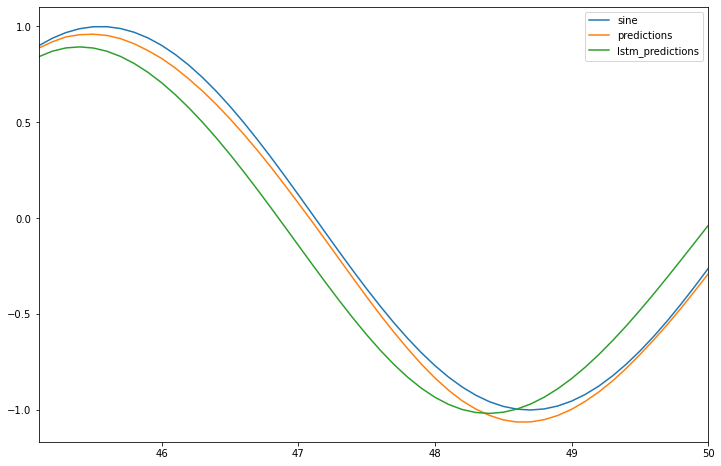

In [120]:
test.plot(figsize=(12,8))

In [121]:
# Forecasting into the future!!

In [122]:
#for forecasting the future values we need to use the full data (train+test) and we will have no values to compare it to

In [123]:
df

,sine
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418
...,...
49.6,-0.617439
49.7,-0.535823
49.8,-0.448854
49.9,-0.357400


In [124]:
full_data = scaler.fit_transform(df)

In [125]:
full_data

array([[4.99999116e-01],
       [5.49916225e-01],
       [5.99334579e-01],
       [6.47760405e-01],
       [6.94709850e-01],
       [7.39713809e-01],
       [7.82322618e-01],
       [8.22110545e-01],
       [8.58680040e-01],
       [8.91665714e-01],
       [9.20737985e-01],
       [9.45606372e-01],
       [9.66022399e-01],
       [9.81782075e-01],
       [9.92727935e-01],
       [9.98750612e-01],
       [9.99789928e-01],
       [9.95835500e-01],
       [9.86926839e-01],
       [9.73152957e-01],
       [9.54651478e-01],
       [9.31607263e-01],
       [9.04250562e-01],
       [8.72854714e-01],
       [8.37733417e-01],
       [7.99237589e-01],
       [7.57751870e-01],
       [7.13690771e-01],
       [6.67494535e-01],
       [6.19624741e-01],
       [5.70559686e-01],
       [5.20789614e-01],
       [4.70811810e-01],
       [4.21125636e-01],
       [3.72227539e-01],
       [3.24606094e-01],
       [2.78737119e-01],
       [2.35078919e-01],
       [1.94067715e-01],
       [1.56113277e-01],


In [126]:
#set the generator
length = 50
full_generator = TimeseriesGenerator(full_data,full_data,length=length,batch_size=1)

In [127]:
# define model
model = Sequential()

# LSTM layer which has 4 gates and 2 memory features(long and short term)
model.add(LSTM(50,input_shape=(length, 1)))

# Final Prediction
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

In [128]:
model.fit_generator(full_generator,epochs=5)

Epoch 1/5
451/451 [==============================] - 43s 96ms/step - loss: 0.0107
Epoch 2/5
451/451 [==============================] - 46s 101ms/step - loss: 2.1144e-04
Epoch 3/5
451/451 [==============================] - 44s 98ms/step - loss: 2.7339e-04
Epoch 4/5
451/451 [==============================] - 46s 102ms/step - loss: 1.8293e-04
Epoch 5/5
451/451 [==============================] - 44s 99ms/step - loss: 2.0243e-04


In [129]:
#now for the full data the first_eval_batch will have points from 450-500 and the forecasts will start from 501 to 550(test size)
forecast = []

first_eval_batch = full_data[-length:]
current_batch = first_eval_batch.reshape((1, length, 1))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    forecast.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

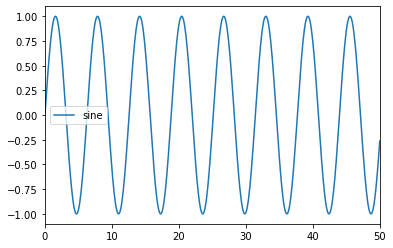

In [130]:
df.plot()

In [131]:
forecast

[array([0.409234], dtype=float32),
 array([0.4572925], dtype=float32),
 array([0.50553536], dtype=float32),
 array([0.5535209], dtype=float32),
 array([0.60079443], dtype=float32),
 array([0.6468685], dtype=float32),
 array([0.6912355], dtype=float32),
 array([0.73338026], dtype=float32),
 array([0.77279425], dtype=float32),
 array([0.80898875], dtype=float32),
 array([0.84150743], dtype=float32),
 array([0.8699398], dtype=float32),
 array([0.89393276], dtype=float32),
 array([0.9131973], dtype=float32),
 array([0.92751634], dtype=float32),
 array([0.93674624], dtype=float32),
 array([0.94081706], dtype=float32),
 array([0.93973005], dtype=float32),
 array([0.9335523], dtype=float32),
 array([0.92241126], dtype=float32),
 array([0.906488], dtype=float32),
 array([0.8860093], dtype=float32),
 array([0.86124223], dtype=float32),
 array([0.8324867], dtype=float32),
 array([0.80007136], dtype=float32),
 array([0.76434755], dtype=float32),
 array([0.72568595], dtype=float32),
 array([0.6844

In [132]:
forecast_predictions = scaler.inverse_transform(forecast)

In [133]:
forecast_predictions

array([[-0.1815288 ],
       [-0.08541255],
       [ 0.01107241],
       [ 0.10704274],
       [ 0.20158902],
       [ 0.29373646],
       [ 0.38246966],
       [ 0.46675854],
       [ 0.54558588],
       [ 0.61797431],
       [ 0.68301116],
       [ 0.73987544],
       [ 0.78786096],
       [ 0.82638969],
       [ 0.85502759],
       [ 0.87348724],
       [ 0.88162881],
       [ 0.87945481],
       [ 0.86709946],
       [ 0.84481751],
       [ 0.81297125],
       [ 0.77201412],
       [ 0.72248044],
       [ 0.66496981],
       [ 0.60013967],
       [ 0.52869263],
       [ 0.45137005],
       [ 0.36894751],
       [ 0.28222726],
       [ 0.19203686],
       [ 0.09922625],
       [ 0.00466591],
       [-0.09075088],
       [-0.18611206],
       [-0.28048304],
       [-0.37290937],
       [-0.46241898],
       [-0.54802889],
       [-0.62875555],
       [-0.70363206],
       [-0.77172881],
       [-0.83217991],
       [-0.8842112 ],
       [-0.92716618],
       [-0.96052885],
       [-0

In [134]:
#we only have the y data we need to generate the x points similar to the df

In [135]:
df

,sine
0.0,0.000000
0.1,0.099833
0.2,0.198669
0.3,0.295520
0.4,0.389418
...,...
49.6,-0.617439
49.7,-0.535823
49.8,-0.448854
49.9,-0.357400


In [136]:
#we generated 50 new points
50*0.1

5.0

In [137]:
#we need points upto 55

In [138]:
new_x  = np.arange(50.1,55.1,0.1)

In [139]:
new_x

array([50.1, 50.2, 50.3, 50.4, 50.5, 50.6, 50.7, 50.8, 50.9, 51. , 51.1,
       51.2, 51.3, 51.4, 51.5, 51.6, 51.7, 51.8, 51.9, 52. , 52.1, 52.2,
       52.3, 52.4, 52.5, 52.6, 52.7, 52.8, 52.9, 53. , 53.1, 53.2, 53.3,
       53.4, 53.5, 53.6, 53.7, 53.8, 53.9, 54. , 54.1, 54.2, 54.3, 54.4,
       54.5, 54.6, 54.7, 54.8, 54.9, 55. ])

In [140]:
fore_df = pd.DataFrame(forecast_predictions,index=new_x)

In [141]:
fore_df

,0
50.1,-0.181529
50.2,-0.085413
50.3,0.011072
50.4,0.107043
50.5,0.201589
50.6,0.293736
50.7,0.382470
50.8,0.466759
50.9,0.545586
51.0,0.617974


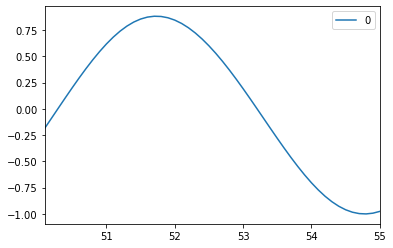

In [142]:
fore_df.plot()

In [143]:
#lets see the forecasted values with the original data

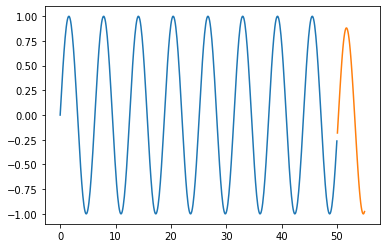

In [145]:
plt.plot(df)
plt.plot(fore_df)

In [146]:
#we can now see the forecasted sine wave which is pretty awesome!!

In [147]:
model.save('ps_sine.h5')